In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import string

In [4]:
from google.colab import files
upload=files.upload() # LOADING DATA FROM OUR LOCAL MACHINE

Saving dataset.csv to dataset.csv


In [5]:
def readcsv():
    df=pd.read_csv("dataset.csv",)#read labelled tweets
    #df2=df.reindex(np.random.permutation(df.index))
    X=df.text
    y=df.label
    return X, y

In [6]:
# READING THE DATASET AND DISPLAYING ITS CONTENTS
df = pd.read_csv('dataset.csv', header=0)
df.head()

,text,TextLabel,label
0,.omg why are poc wearing fugly blue contacts s...,Non-Bullying,0
1,.Sorry but most of the runners popular right n...,Non-Bullying,0
2,".those jeans are hideous, and I?m afraid he?s ...",Non-Bullying,0
3,.I had to dress up for a presentation in class...,Non-Bullying,0
4,.Am I the only one who thinks justin bieber is...,Non-Bullying,0


In [64]:
def createSVM(X,y):
    svm_clf=Pipeline([('vect',CountVectorizer(max_df=0.7)),('tfidf',TfidfTransformer()),('svm',SVC(kernel="linear",C=1))])
    svm_clf=svm_clf.fit(X,y)
    return svm_clf

In [65]:
def createNB(X,y):
    nb_clf=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('nb',MultinomialNB())])
    nb_clf=nb_clf.fit(X,y)
    return nb_clf

In [66]:
def drawrocSVM(y_test,y_pred):
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    print("Drawing")
    roc_auc=auc(fpr,tpr)
    plt.title('Support Vector Machine Accuracy')
    plt.plot(fpr,tpr,'b',label='SVM AUC = %0.2f'%roc_auc,color='b')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [67]:
def drawrocNB(y_test,y_pred):
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    print("Drawing")
    roc_auc=auc(fpr,tpr)
    plt.title('Naive Bayes Accuracy')
    plt.plot(fpr,tpr,'b',label='NB AUC = %0.2f'%roc_auc,color='r')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [68]:
def drawrocKNN(y_test,y_pred):
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    print("Drawing")
    roc_auc=auc(fpr,tpr)
    plt.title('KNN Accuracy')
    plt.plot(fpr,tpr,'b',label='KNN AUC = %0.2f'%
    roc_auc,color='g')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Support Vector Machine Classifier
Evaluation
SVM metrics
0.721875
              precision    recall  f1-score   support

           0       0.73      0.82      0.78       187
           1       0.70      0.58      0.63       133

    accuracy                           0.72       320
   macro avg       0.72      0.70      0.70       320
weighted avg       0.72      0.72      0.72       320

Drawing


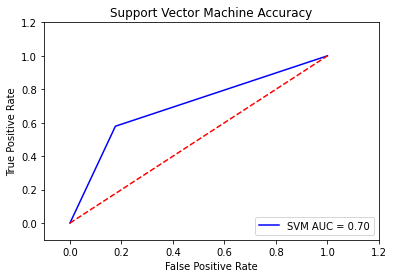

In [69]:
def experiment1(X,y): # Support Vector Machine Classifier
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
    svm=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('svm',SVC(kernel="linear",C=1))])
    svm=svm.fit(X_train,y_train)
    ypred=svm.predict(X_test)
    print("SVM metrics")
    print(metrics.accuracy_score(y_test,ypred))
    print(metrics.classification_report(y_test,ypred))
    drawrocSVM(y_test,ypred)
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment1(X,y)#calling the Support Vector Machine
    
if __name__=="__main__":
    main()

Naive Bayes Classifier
Evaluation
NB Metrics
0.721875
              precision    recall  f1-score   support

           0       0.69      0.97      0.80       187
           1       0.89      0.38      0.53       133

    accuracy                           0.72       320
   macro avg       0.79      0.67      0.67       320
weighted avg       0.77      0.72      0.69       320

Drawing


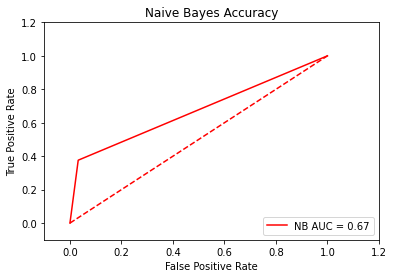

In [70]:
def experiment1(X,y): # Naive Bayes Classifier
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)    
    nb=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('tfidf',TfidfTransformer()),('nb',MultinomialNB())])
    nb=nb.fit(X_train,y_train)
    yprednb=nb.predict(X_test)
    print("NB Metrics")
    print(metrics.accuracy_score(y_test,yprednb))
    print(metrics.classification_report(y_test,yprednb))
    drawrocNB(y_test,yprednb)
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment1(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main()

KNN Classifier
Evaluation
KNN evaluation
0.665625
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       187
           1       0.59      0.66      0.62       133

    accuracy                           0.67       320
   macro avg       0.66      0.67      0.66       320
weighted avg       0.67      0.67      0.67       320

Drawing


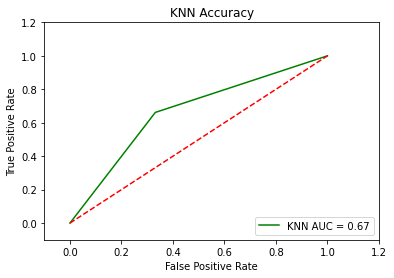

In [71]:
def experiment1(X,y): # KNN Classifier
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
    knn=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("KNN evaluation")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
    drawrocKNN(y_test,ypredknn)
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment1(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main()


In [72]:
def experiment2(X,y): # Different features with Support Vector Machine
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    svm=createSVM(X_train,y_train)
    y_pred=(svm.predict(X_test))
    print("Original Accuracy: Unigram with tf-idf")
    print(metrics.confusion_matrix(y_test,y_pred))
    print(metrics.accuracy_score(y_test,y_pred))
    print(metrics.classification_report(y_test,y_pred))
    stop=["haha","lol","lmao"]
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment2(X,y)#calling Support Vector Machine Classifier
    
if __name__=="__main__":
    main()

Support Vector Machine Classifier
Evaluation
Original Accuracy: Unigram with tf-idf
[[149  49]
 [ 46  76]]
0.703125
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       198
           1       0.61      0.62      0.62       122

    accuracy                           0.70       320
   macro avg       0.69      0.69      0.69       320
weighted avg       0.70      0.70      0.70       320



In [73]:
def experiment2(X,y): # Different features with Support Vector Machine
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    svm2=Pipeline([('vect',CountVectorizer()),('svm',SVC(kernel="linear",C=1))])
    svm2=svm2.fit(X_train,y_train)
    ypred2=svm2.predict(X_test)
    print("Just unigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypred2))
    print(metrics.classification_report(y_test,ypred2))
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment2(X,y)#calling Support Vector Machine Classifier
    
if __name__=="__main__":
    main()

Support Vector Machine Classifier
Evaluation
Just unigram counts Accuracy
0.690625
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       195
           1       0.60      0.61      0.61       125

    accuracy                           0.69       320
   macro avg       0.68      0.68      0.68       320
weighted avg       0.69      0.69      0.69       320



In [74]:
def experiment2(X,y): # Different features with Support Vector Machine
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    svm3=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('svm',SVC(kernel="linear",C=1))])
    svm3=svm3.fit(X_train,y_train)
    ypred3=svm3.predict(X_test)
    print("Just bigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypred3))
    print(metrics.classification_report(y_test,ypred3))
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment2(X,y)#calling Support Vector Machine Classifier
    
if __name__=="__main__":
    main()


Support Vector Machine Classifier
Evaluation
Just bigram counts Accuracy
0.70625
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       189
           1       0.65      0.60      0.63       131

    accuracy                           0.71       320
   macro avg       0.70      0.69      0.69       320
weighted avg       0.70      0.71      0.70       320



In [75]:
def experiment2(X,y): # Different features with Support Vector Machine
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    svm4=Pipeline([('vect',CountVectorizer(ngram_range=(1,3))),('svm',SVC(kernel="linear",C=1))])
    svm4=svm4.fit(X_train,y_train)
    ypred4=svm4.predict(X_test)
    print("Trigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypred4))
    print(metrics.classification_report(y_test,ypred4))
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment2(X,y)#calling Support Vector Machine Classifier
    
if __name__=="__main__":
    main()


Support Vector Machine Classifier
Evaluation
Trigram counts Accuracy
0.740625
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       189
           1       0.72      0.60      0.66       131

    accuracy                           0.74       320
   macro avg       0.74      0.72      0.72       320
weighted avg       0.74      0.74      0.74       320



In [76]:
def experiment2(X,y): # Different features with Support Vector Machine
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    svm5=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('tfidf',TfidfTransformer()),('svm',SVC(kernel="linear",C=1))])
    svm5=svm5.fit(X_train,y_train)
    ypred5=svm5.predict(X_test)
    print("Bigram with tfidf Accuracy")
    print(metrics.accuracy_score(y_test,ypred5))
    print(metrics.classification_report(y_test,ypred5))
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment2(X,y)#calling Support Vector Machine Classifier
    
if __name__=="__main__":
    main()

Support Vector Machine Classifier
Evaluation
Bigram with tfidf Accuracy
0.759375
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       196
           1       0.69      0.69      0.69       124

    accuracy                           0.76       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.76      0.76      0.76       320



In [77]:
def experiment2(X,y): # Different features with Support Vector Machine
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    svm6=Pipeline([('vect',CountVectorizer(ngram_range=(1,3))),('tfidf',TfidfTransformer()),('svm',SVC(kernel="linear",C=1))])
    svm6=svm6.fit(X_train,y_train)
    ypred6=svm6.predict(X_test)
    print("Trigram with tfidf Accuracy")
    print(metrics.accuracy_score(y_test,ypred6))
    print(metrics.classification_report(y_test,ypred6))
def main():
    print("Support Vector Machine Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment2(X,y)#calling Support Vector Machine Classifier
    
if __name__=="__main__":
    main()

Support Vector Machine Classifier
Evaluation
Trigram with tfidf Accuracy
0.775
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       189
           1       0.72      0.75      0.73       131

    accuracy                           0.78       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.78      0.78      0.78       320



In [78]:
def experiment3(X,y): #  Different features Naive Bayes
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    nb=createNB(X_train,y_train)
    y_pred=nb.predict(X_test)
    print("Original Accuracy - Unigram with tfidf")
    print(metrics.classification_report(y_test,y_pred))
    print(metrics.accuracy_score(y_test,y_pred))
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment3(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main()

Naive Bayes Classifier
Evaluation
Original Accuracy - Unigram with tfidf
              precision    recall  f1-score   support

           0       0.69      0.94      0.80       193
           1       0.79      0.36      0.50       127

    accuracy                           0.71       320
   macro avg       0.74      0.65      0.65       320
weighted avg       0.73      0.71      0.68       320

0.709375


In [79]:
def experiment3(X,y): # Different Feature set with Naive Bayes
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    nb2=Pipeline([('vect',CountVectorizer()),('nb',MultinomialNB())])
    nb2=nb2.fit(X_train,y_train)
    ypred2=nb2.predict(X_test)
    print("Just Unigrams counts Accuracy")
    print(metrics.classification_report(y_test,ypred2))
    print(metrics.accuracy_score(y_test,ypred2))
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment3(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main()

Naive Bayes Classifier
Evaluation
Just Unigrams counts Accuracy
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       184
           1       0.66      0.58      0.62       136

    accuracy                           0.70       320
   macro avg       0.69      0.68      0.68       320
weighted avg       0.69      0.70      0.69       320

0.696875


In [80]:
def experiment3(X,y): # Different Feature set with Naive Bayes
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    nb3=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('nb',MultinomialNB())])
    nb3=nb3.fit(X_train,y_train)
    ypred3=nb3.predict(X_test)
    print("Bigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypred3))
    print(metrics.classification_report(y_test,ypred3))
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment3(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main()

Naive Bayes Classifier
Evaluation
Bigram counts Accuracy
0.740625
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       184
           1       0.72      0.65      0.68       136

    accuracy                           0.74       320
   macro avg       0.74      0.73      0.73       320
weighted avg       0.74      0.74      0.74       320



In [81]:
def experiment3(X,y): # Different Feature set with Naive Bayes
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    nb4=Pipeline([('vect',CountVectorizer(ngram_range=(1,3))),('nb',MultinomialNB())])
    nb4=nb4.fit(X_train,y_train)
    ypred4=nb4.predict(X_test)
    print("Trigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypred4))
    print(metrics.classification_report(y_test,ypred4))
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment3(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main()

Naive Bayes Classifier
Evaluation
Trigram counts Accuracy
0.759375
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       191
           1       0.77      0.58      0.66       129

    accuracy                           0.76       320
   macro avg       0.76      0.73      0.74       320
weighted avg       0.76      0.76      0.75       320



In [82]:
def experiment3(X,y): # Different Feature set with Naive Bayes
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    nb5=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('tfidf',TfidfTransformer()),('nb',MultinomialNB())])
    nb5=nb5.fit(X_train,y_train)
    ypred5=nb5.predict(X_test)
    #drawrocSVM(y_test,ypred5)
    print("Bigram with tfidf Accuracy")
    print(metrics.accuracy_score(y_test,ypred5))
    print(metrics.classification_report(y_test,ypred5))
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment3(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main() 

Naive Bayes Classifier
Evaluation
Bigram with tfidf Accuracy
0.7
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       188
           1       0.86      0.33      0.47       132

    accuracy                           0.70       320
   macro avg       0.77      0.64      0.63       320
weighted avg       0.75      0.70      0.66       320



In [83]:
def experiment3(X,y): # Different Feature set with Naive Bayes
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    nb6=Pipeline([('vect',CountVectorizer(ngram_range=(1,3))),('tfidf',TfidfTransformer()),('nb',MultinomialNB())])
    nb6=nb6.fit(X_train,y_train)
    ypred6=nb6.predict(X_test)
    #drawrocSVM(y_test,ypred5)
    print("Trigram with tfidf Accuracy")
    print(metrics.classification_report(y_test,ypred6))
    print(metrics.accuracy_score(y_test,ypred6))
def main():
    print("Naive Bayes Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment3(X,y)#calling Naive Bayes Classifier
    
if __name__=="__main__":
    main()

Naive Bayes Classifier
Evaluation
Trigram with tfidf Accuracy
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       207
           1       0.77      0.42      0.55       113

    accuracy                           0.75       320
   macro avg       0.76      0.68      0.69       320
weighted avg       0.76      0.75      0.73       320

0.753125


In [84]:
def experiment4(X,y): # Different feature sets with KNN
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    knn=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("Original Accuracy: Unigram with tfidf")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment4(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main()

KNN Classifier
Evaluation
Original Accuracy: Unigram with tfidf
0.684375
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       190
           1       0.60      0.68      0.64       130

    accuracy                           0.68       320
   macro avg       0.68      0.68      0.68       320
weighted avg       0.69      0.68      0.69       320



In [85]:
def experiment4(X,y): # Different feature sets with KNN
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    knn=Pipeline([('vect',CountVectorizer()),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("Unigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment4(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main()

    

KNN Classifier
Evaluation
Unigram counts Accuracy
0.615625
              precision    recall  f1-score   support

           0       0.72      0.57      0.64       190
           1       0.52      0.68      0.59       130

    accuracy                           0.62       320
   macro avg       0.62      0.63      0.61       320
weighted avg       0.64      0.62      0.62       320



In [86]:
def experiment4(X,y): # Different feature sets with KNN
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    knn=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("Bigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment4(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main() 

KNN Classifier
Evaluation
Bigram counts Accuracy
0.7
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       188
           1       0.66      0.58      0.61       132

    accuracy                           0.70       320
   macro avg       0.69      0.68      0.68       320
weighted avg       0.70      0.70      0.70       320



In [87]:
def experiment4(X,y): # Different feature sets with KNN
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    knn=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('tfidf',TfidfTransformer()),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("Bigram with tfidf Accuracy")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment4(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main()

    

KNN Classifier
Evaluation
Bigram with tfidf Accuracy
0.65625
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       190
           1       0.56      0.70      0.62       130

    accuracy                           0.66       320
   macro avg       0.66      0.66      0.65       320
weighted avg       0.68      0.66      0.66       320



In [88]:
def experiment4(X,y): # Different feature sets with KNN
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    knn=Pipeline([('vect',CountVectorizer(ngram_range=(1,3))),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("Trigram counts Accuracy")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evaluation")
    experiment4(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main()

    

KNN Classifier
Evaluation
Trigram counts Accuracy
0.621875
              precision    recall  f1-score   support

           0       0.74      0.62      0.68       205
           1       0.48      0.62      0.54       115

    accuracy                           0.62       320
   macro avg       0.61      0.62      0.61       320
weighted avg       0.65      0.62      0.63       320



In [89]:
def experiment4(X,y): # Different feature sets with KNN
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    knn=Pipeline([('vect',CountVectorizer(ngram_range=(1,3))),('tfidf',TfidfTransformer()),('knn',KNeighborsClassifier())])
    knn=knn.fit(X_train,y_train)
    ypredknn=knn.predict(X_test)
    print("Trigram with tfidf Accuracy")
    print(metrics.accuracy_score(y_test,ypredknn))
    print(metrics.classification_report(y_test,ypredknn))
def main():
    print("KNN Classifier")
    X,y=readcsv()
    print("Evalutaion")
    experiment4(X,y)#calling KNN Classifier
    
if __name__=="__main__":
    main()

KNN Classifier
Evalutaion
Trigram with tfidf Accuracy
0.653125
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       181
           1       0.60      0.59      0.60       139

    accuracy                           0.65       320
   macro avg       0.65      0.65      0.65       320
weighted avg       0.65      0.65      0.65       320

